C:\Users\Rene\Anaconda\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in log


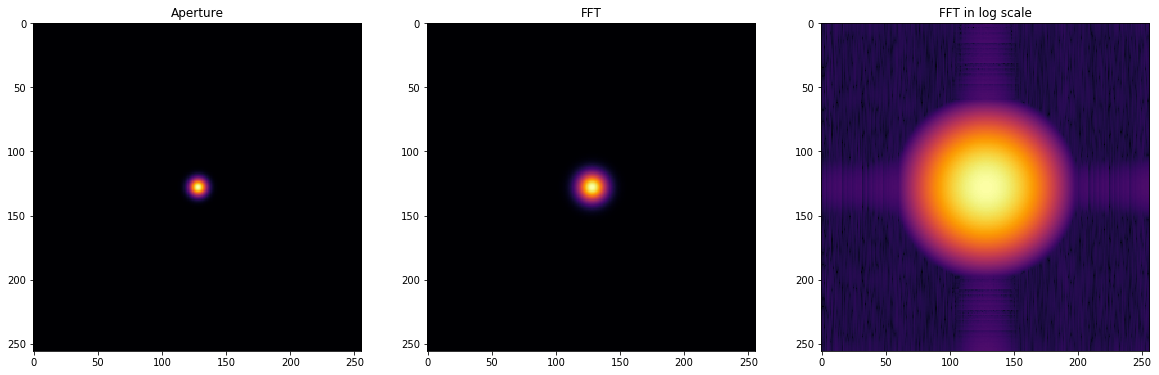

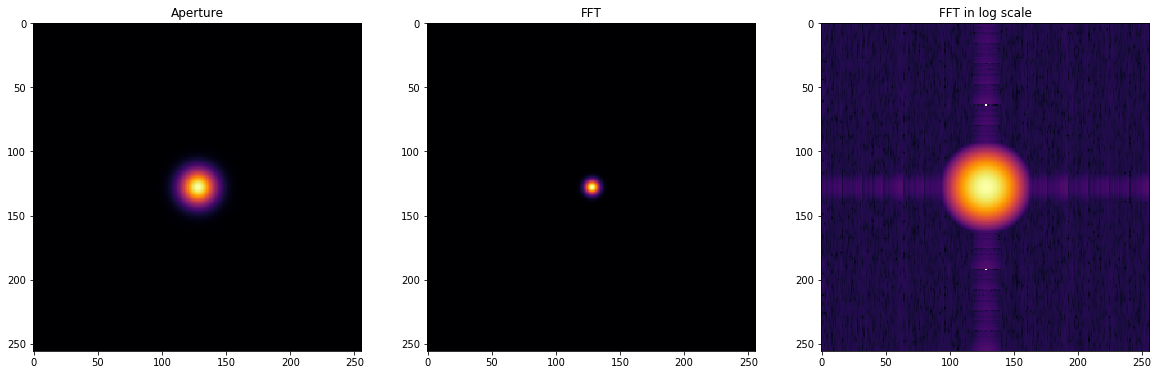

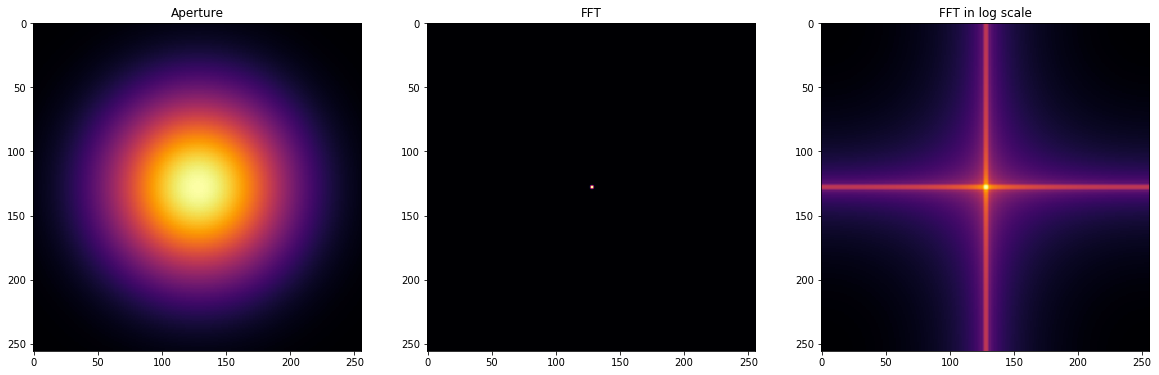

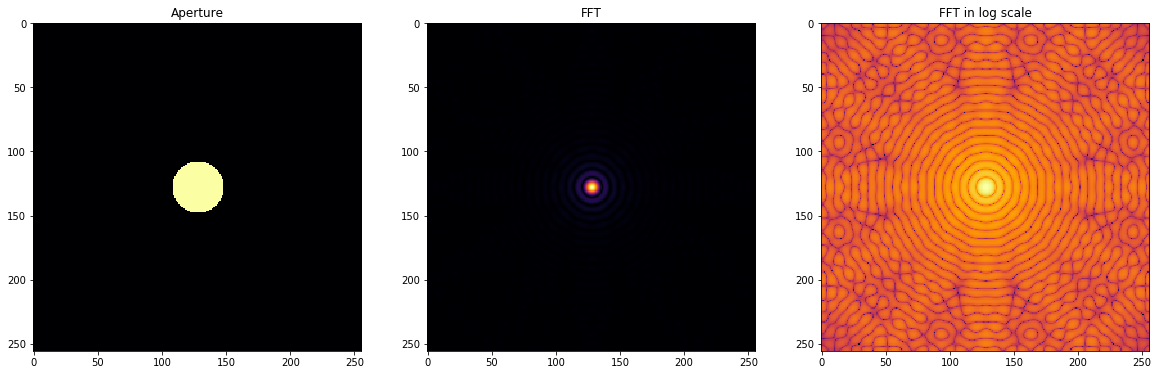

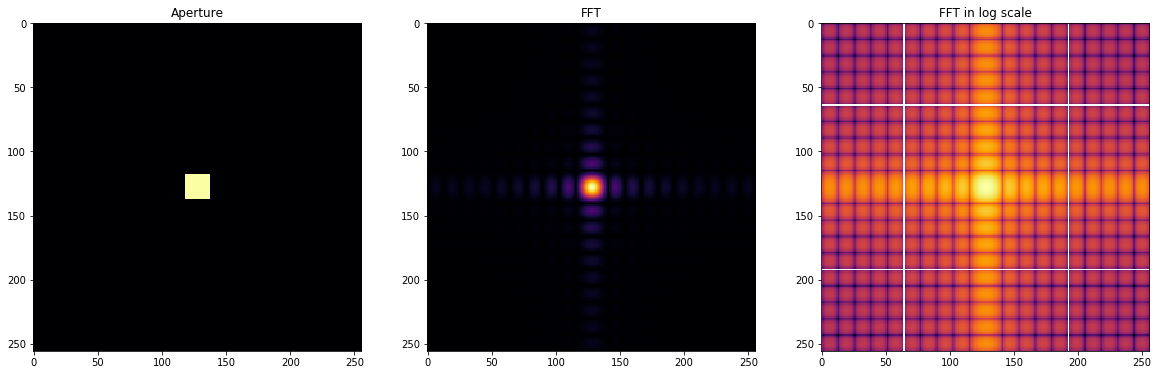

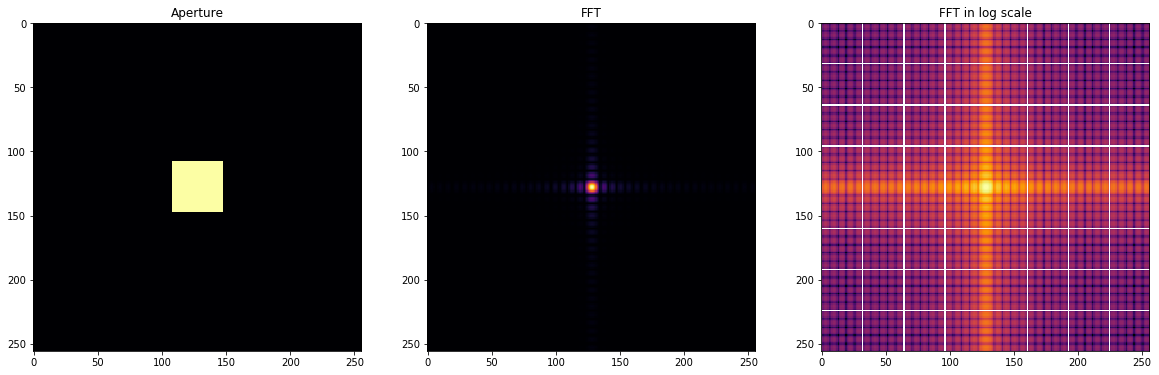

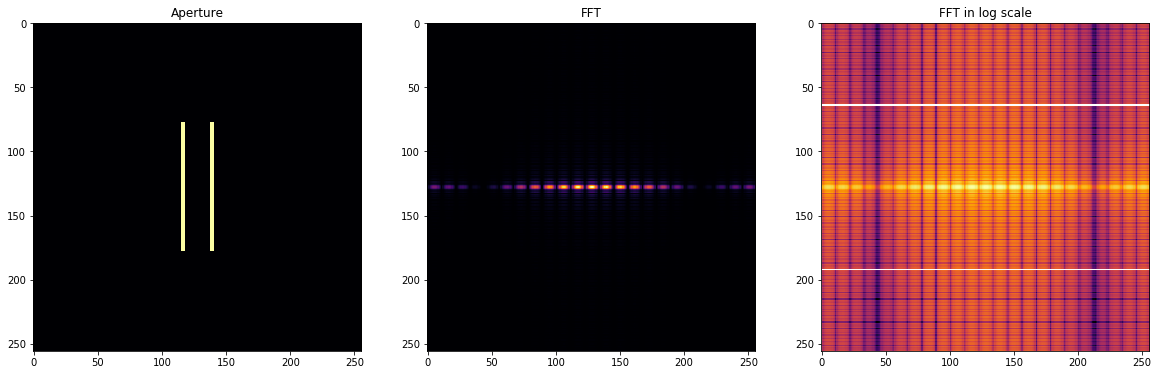

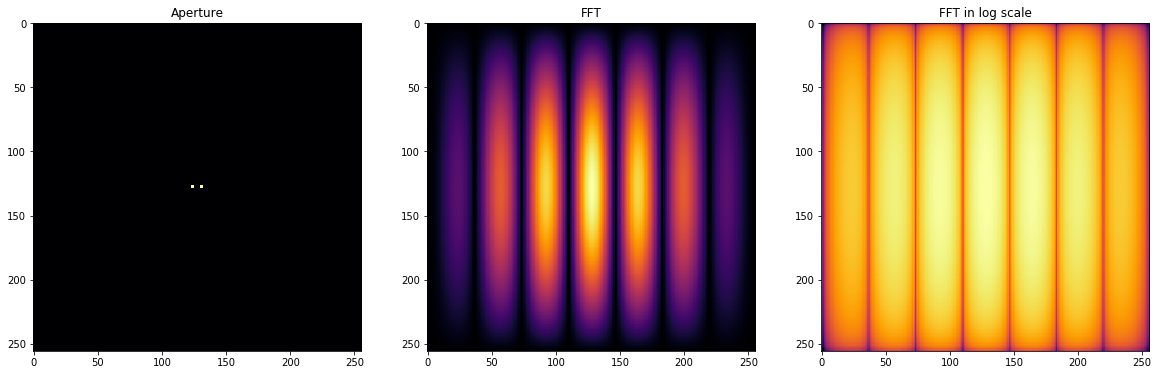

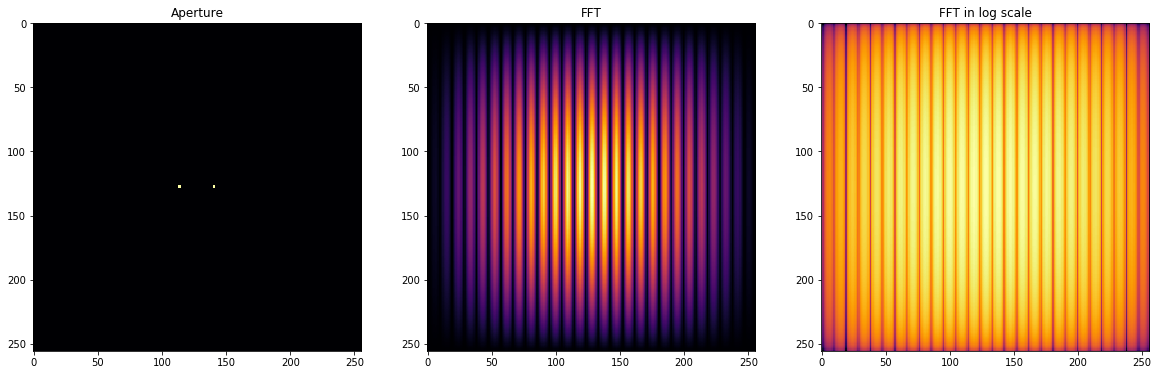

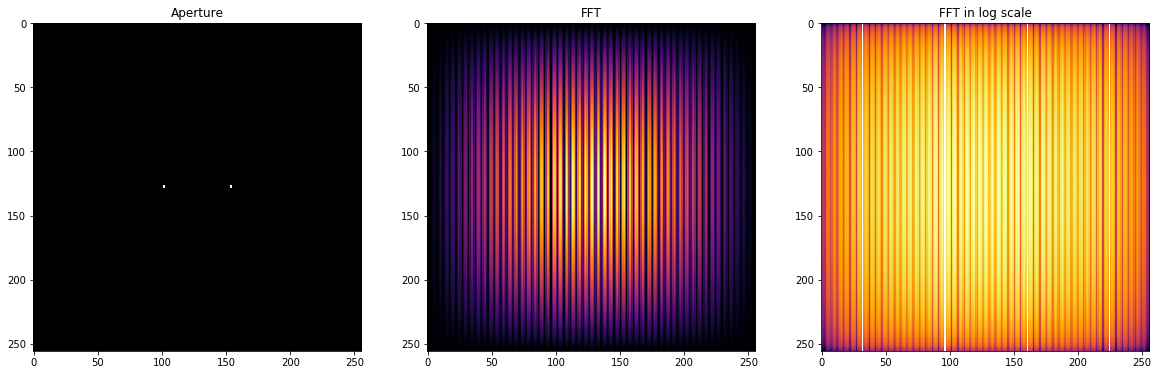

In [23]:
# -*- coding: utf-8 -*-
"""
Created on Thu Oct 18 08:51:37 2018

@author: Rene
"""

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
from skimage.draw import circle
from numpy.fft import fft2,ifft2,fftshift,ifftshift

def FFT(aperture):
    f = plt.figure(figsize=(20,60))
    ax1 = f.add_subplot(131)
    ax1.imshow(aperture, cmap = 'inferno')
    plt.title('Aperture')
    ft_aperture = fft2(aperture)
    FT_aperture = fftshift(np.abs(ft_aperture))
    ax2 = f.add_subplot(132)
    ax2.imshow(FT_aperture, cmap = 'inferno')
    plt.title('FFT')
    ax3 = f.add_subplot(133)
    ax3.imshow(np.log(FT_aperture), cmap = 'inferno')
    plt.title('FFT in log scale')



def Circ(r): #circle
    L = 256
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    x, y = circle(*center, r)
    aperture[x, y] = 1
    
    return aperture

def Rec(w,h): #rectangle
    L = 256
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    for i in np.arange(center[0]-w//2,center[0]+w//2): #width
        for j in np.arange(center[1]-h//2,center[1]+h//2) : #height
            aperture[int(i)][int(j)] = 1
            
    return aperture

def Slit(d,h,w): #doubleslit
    L = 256
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    x = (center[0]-d/2,center[0]+d/2)
    for i1 in np.arange(x[0]-w,x[0]):
        for i2 in np.arange(x[1], x[1]+w):
            for j in np.arange(center[1]-h//2,center[1]+h//2):
                aperture[int(j)][int(i1)] = 1
                aperture[int(j)][int(i2)] = 1

            
    return aperture     

def Gaussian(sigma):
    L = 256
    aperture = np.zeros(shape = (L,L), dtype = float)
    center = (L/2,L/2)
    for i in np.arange(center[0]-L//2,center[0]+L//2):
        for j in np.arange(center[1]-L//2,center[1]+L//2):
            aperture[int(i)][int(j)] += np.abs(np.exp(-((i-L/2)*(i-L/2)+(j-L/2)*(j-L/2))/(2*sigma*sigma)))
            
    return aperture


FFT(Gaussian(5))
#plt.savefig('gaussian5.png')
FFT(Gaussian(10))
#plt.savefig('gaussian10.png')
FFT(Gaussian(50))
#plt.savefig('gaussian50.png')
FFT(Circ(20))
#plt.savefig('circle20.png')
FFT(Rec(20,20))
FFT(Rec(40,40))
#plt.savefig('square20.png')
FFT(Slit(20,100,3))
#plt.savefig('doubleslit.png')
FFT(Slit(5,2,2))
#plt.savefig('dot5.png')
FFT(Slit(25,2,2))
#plt.savefig('dot25.png')
FFT(Slit(50,2,2))
#plt.savefig('dot50.png')

In [80]:
def sin(f, theta): #doubleslit
    x = np.linspace(0,np.pi, 256)
    X,Y = np.meshgrid(x,x)
    Z = np.sin(2*f*(np.sin(theta)+np.cos(theta)))

    return Z     

TypeError: Invalid dimensions for image data

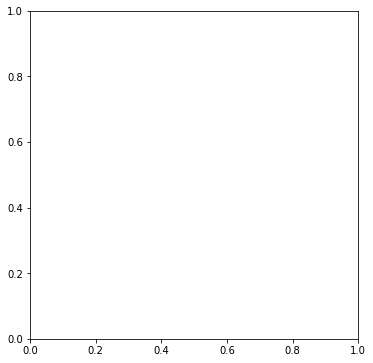

In [81]:
FFT(sin(5,np.pi/2))

In [5]:
np.exp(complex(1,(np.pi)))

(-2.718281828459045+3.328935140402784e-16j)